# Dogs Breed Identification Kaggle With Stanford Images

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.sgdr import *
from fastai.dataset import *
from fastai.plots import *

!curl "http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar" -H "Host: vision.stanford.edu" -H "User-Agent: Mozilla/5.0 (Windows NT 10.0; WOW64; rv:58.0) Gecko/20100101 Firefox/58.0" -H "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8" -H "Accept-Language: en-US,en;q=0.5" --compressed -H "Referer: http://vision.stanford.edu/aditya86/ImageNetDogs/main.html" -H "DNT: 1" -H "Connection: keep-alive" -H "Upgrade-Insecure-Requests: 1" -o Stanford_Dog_images.tar

!tar xf Stanford_Dog_images.tar fastai/courses/dl1/data/DogBreed/

In [3]:
PATH = "data/DogBreed/Stanford/"

!ls

In [4]:
!ls {PATH} # this arch do not need a valid folder as csv has refrence for all the files that belong to train or valid

models		       submission_inception_6march.csv	tmp    valid
sample_submission.csv  test				train


!wget https://www.kaggle.com/c/dog-breed-identification/download/train.zip

In [5]:
sz=299

In [6]:
{PATH}

{'data/DogBreed/Stanford/'}

label_csv='labels.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [7]:
arch = inception_4# Inceptionresnet_2 Arch
bs = 20 # why batch size 58 not 20

data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz),test_name ='test')

In [8]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

!curl "http://files.fast.ai/models/weights.tgz" -H "Host: files.fast.ai" -H "User-Agent: Mozilla/5.0 (Windows NT 10.0; WOW64; rv:58.0) Gecko/20100101 Firefox/58.0" -H "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8" -H "Accept-Language: en-US,en;q=0.5" --compressed -H "Referer: http://forums.fast.ai/t/lesson-2-in-class-discussion/7452/317" -H "DNT: 1" -H "Connection: keep-alive" -H "Upgrade-Insecure-Requests: 1" -o weights.tgz

## * UNZZIP ERROR :  To Avoid the unzip error , Extarct files with either 7-zip or other extractor say rar

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 85%|████████▌ | 224/262 [00:03<00:00, 57.77it/s, loss=5.63]


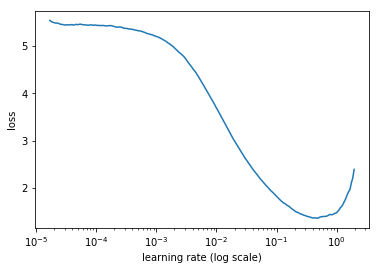

In [9]:
learn.lr_find()
learn.sched.plot()

##### Learning rate and EPOC and cycle is crutial here

In [10]:
learn.fit(1e-1,10)

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

[0.      0.43193 0.32883 0.91022]                            
[1.      0.31903 0.27545 0.92134]                            
[2.      0.26459 0.24977 0.93035]                            
[3.      0.22559 0.25468 0.93061]                            
[4.      0.19607 0.26217 0.92585]                            
[5.      0.21264 0.25957 0.92373]                            
[6.      0.17686 0.2734  0.92664]                            
[7.      0.16111 0.28355 0.92717]                            
[8.      0.15709 0.27623 0.92876]                            
[9.      0.14394 0.28652 0.92479]                            



#### Understanding the results :
 1. Column 1 repesents EPOC
 2. Column 2 represents Training loss
 3. Column 3 represents Validation LOSS
 4. Column 4 represents Accuracy

In [11]:
#loss incressing acc decreasing 
learn.save('299 data')

In [12]:
learn.load('299 data')

In [13]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, 224),test_name ='test')
learn = ConvLearner.pretrained(arch, data, precompute = False) #Precompute= false is ideal, should be done as this will create new image at each layer as weights are being calculated check

In [ ]:
learn.fit(1e-1,3, cycle_len = 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

[0.      0.57614 0.44491 0.87156]                            
  4%|▍         | 10/262 [00:09<03:49,  1.10it/s, loss=0.548]

In [ ]:
learn.save('299_u')
learn.load('299_u')

In [ ]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, 224),test_name = 'test')
learn = ConvLearner.pretrained(arch, data, precompute = True) #Precompute= false is ideal, should be done as this will create new image at each layer as weights are being calculated check
learn.fit(.1, 3, cycle_len=1, cycle_mult=2)

In [ ]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, 235),test_name ='test')
learn = ConvLearner.pretrained(arch, data, precompute = False) #Precompute= false is ideal, should be done as this will create new image at each layer as weights are being calculated check

In [ ]:
learn.fit(.1, 3, cycle_len=4)

In [ ]:
learn.save('Acc_')

In [ ]:
learn.load('Acc_')

In [ ]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, 335),test_name ='test')
learn = ConvLearner.pretrained(arch, data, precompute = False) #Precompute= false is ideal, should be done as this will create new image at each layer as weights are being calculated check

In [ ]:
learn.fit(.1, 3, cycle_len=9)

In [23]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, 350))
learn = ConvLearner.pretrained(arch, data, precompute = True) #Precompute= false is ideal, should be done as this will create new image at each layer as weights are being calculated check
learn.fit(.1, 3, cycle_len=3, cycle_mult=3)

100%|██████████| 59/59 [02:03<00:00,  2.10s/it]


HBox(children=(IntProgress(value=0, description='Epoch', max=39), HTML(value='')))

[0.      0.41599 0.26488 0.92134]                            
[1.      0.22926 0.21747 0.9322 ]                            
[2.      0.19352 0.20722 0.93697]                            
[3.      0.26055 0.24504 0.9277 ]                            
[4.      0.22354 0.25687 0.92691]                            
[5.      0.17872 0.24485 0.92346]                            
[6.      0.1658  0.23339 0.93061]                            
[7.      0.1359  0.2199  0.93671]                            
[8.      0.11759 0.22559 0.93459]                            
[9.      0.10058 0.21921 0.93697]                             
[10.       0.10462  0.22201  0.93724]                         
[11.       0.09906  0.22357  0.93803]                         
[12.       0.15744  0.25677  0.92744]                        
[13.       0.14703  0.2412   0.93776]                        
[14.       0.14458  0.26395  0.92929]                        
[15.       0.12413  0.25361  0.93194]                        
[16. 

In [ ]:
learn.save('Acc_93')
learn.load('Acc_93')

In [30]:
learn.predict(is_test = True)

array([[-12.64923, -12.11201, -11.97138, ..., -14.03503, -11.6909 , -12.71637],
       [ -9.84844, -10.8201 ,  -8.21232, ..., -10.63231, -10.81662, -12.54858],
       [-13.29932, -10.77245, -12.26993, ..., -12.60484, -12.46212, -12.18491],
       ...,
       [-12.26187, -12.26645, -13.58498, ..., -13.20731, -11.84592, -14.0061 ],
       [-10.57263, -11.66389, -12.83298, ...,  -7.58437,  -8.07069, -10.03744],
       [-10.52373, -10.30915,  -9.88855, ...,  -8.32233,  -8.57796, -10.16378]], dtype=float32)

In [31]:
%time log_preds,y=learn.TTA()
test_preds=learn.predict(is_test=True)
print (test_preds)

CPU times: user 3.41 s, sys: 3.3 s, total: 6.71 s
Wall time: 3.75 s
[[-12.64923 -12.11201 -11.97138 ... -14.03503 -11.6909  -12.71637]
 [ -9.84844 -10.8201   -8.21232 ... -10.63231 -10.81662 -12.54858]
 [-13.29932 -10.77245 -12.26993 ... -12.60484 -12.46212 -12.18491]
 ...
 [-12.26187 -12.26645 -13.58498 ... -13.20731 -11.84592 -14.0061 ]
 [-10.57263 -11.66389 -12.83298 ...  -7.58437  -8.07069 -10.03744]
 [-10.52373 -10.30915  -9.88855 ...  -8.32233  -8.57796 -10.16378]]


In [50]:
test_preds = np.exp(test_preds)
test_preds.shape

(10357, 121)

In [52]:
preds = np.mean(np.exp(log_preds),axis = 0)
preds

0.008264462

In [53]:
# Create the submission file using the probabilities
# Get a list of image file names from the test data loader
im_fnames = data.test_dl.dataset.fnames

In [54]:
# We need to control the order of our predictions - it is not the same as in sample_submission.csv file. Order of categories is the same because it's in alphabetical order.
test_df = pd.DataFrame(test_preds)

In [60]:
 #Here's how to get those predictions into a csv file for submitting. For more, refer to this Kaggle kernel: https://www.kaggle.com/orangutan/keras-vgg19-starter
sample_sub_csv = f'{PATH}sample_submission.csv'
df_sample_sub = pd.read_csv(sample_sub_csv, index_col=None)# here index_col = 'id' is changed from index_col= 'id' as it was returing one column less

# Get column names from sample_submission.csv
sub_columns = df_sample_sub.columns

# Sanity check - print first 3 rows of test preds pandas dataframe.
test_df.head(n=3)

final_df = test_df

# Assign column names from sample submission into the final submission df.
final_df.columns = sub_columns

# Get the image file names from test set
test_fnames = [i.split('.jpg')[0].split('/')[-1] for i in data.test_dl.dataset.fnames]

# Set the final submission df index column (id) values using the test set file names
final_df.index = test_fnames
final_df.index.name = 'id' # set index column name

# Save final submission dataframe to CSV file.
final_df.to_csv(PATH + 'submission_inception_6march.csv', index=True)

In [61]:
test_preds

array([[1.     , 1.00001, 1.00001, ..., 1.     , 1.00001, 1.     ],
       [1.00005, 1.00002, 1.00027, ..., 1.00002, 1.00002, 1.     ],
       [1.     , 1.00002, 1.     , ..., 1.     , 1.     , 1.00001],
       ...,
       [1.     , 1.     , 1.     , ..., 1.     , 1.00001, 1.     ],
       [1.00003, 1.00001, 1.     , ..., 1.00051, 1.00031, 1.00004],
       [1.00003, 1.00003, 1.00005, ..., 1.00024, 1.00019, 1.00004]], dtype=float32)

In [63]:
preds

0.008264462